In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


In [2]:
data=pd.read_csv("./data.csv", na_values=[-99999.00])
data.dropna(inplace=True)
data

,Year,Entity,Code,Sales of cigarettes per adult per day,age-standardized_death_rate_per_100k_male,age-standardized_death_rate_per_100k_female
50,1950,United States,USA,9.3,19.56,4.34
51,1951,United States,USA,9.8,20.73,4.35
52,1952,United States,USA,10.0,22.38,4.52
53,1953,United States,USA,9.7,24.35,4.41
54,1954,United States,USA,9.2,25.30,4.43
...,...,...,...,...,...,...
110,2010,United States,USA,3.6,40.85,26.54
111,2011,United States,USA,3.5,39.27,25.81
112,2012,United States,USA,3.5,38.15,25.49
113,2013,United States,USA,3.3,36.62,24.83


dataset:

- anno
- stato
- numero medio di singarette vendute a una persona in una settimana
- tasso di mortalità per i sessi 

Regressione lineare.

In [3]:
years=data["Year"].values
sales=data["Sales of cigarettes per adult per day"].values
rate_male=data["age-standardized_death_rate_per_100k_male"].values
rate_female=data["age-standardized_death_rate_per_100k_female"].values


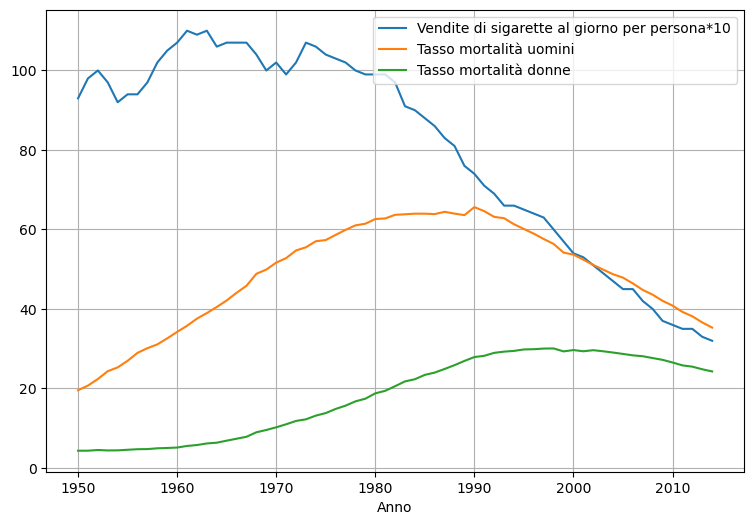

In [4]:
fig, ax=plt.subplots(figsize=(9,6))
ax.plot(years, 10*sales, label="Vendite di sigarette al giorno per persona*10")
ax.plot(years, rate_male, label="Tasso mortalità uomini")
ax.plot(years, rate_female, label="Tasso mortalità donne")
ax.grid()
ax.set_xlabel("Anno")
ax.legend(loc="upper right")
plt.show()

In media dopo quanti anni si muore?

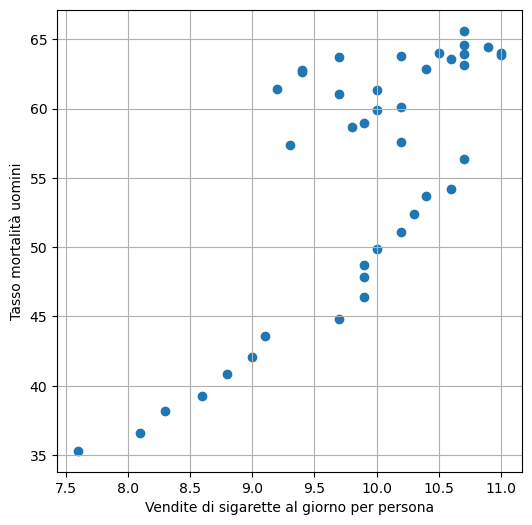

In [5]:
lag=25
rate_male_lag=np.roll(rate_male, -lag)[:-lag]
fig, ax=plt.subplots(figsize=(6,6))
ax.scatter(sales[:-lag], rate_male_lag)
ax.set_xlabel("Vendite di sigarette al giorno per persona")
ax.set_ylabel("Tasso mortalità uomini")
ax.grid()
plt.show()

incremento il lag i punti si apporssimano con la retta

Faccciamo tante regressioni per il lag e quella che ha R^2 più alto mi dà il lag coretto

In [6]:
rate_male

array([19.56, 20.73, 22.38, 24.35, 25.3 , 26.96, 28.96, 30.13, 31.09,
       32.6 , 34.23, 35.77, 37.57, 38.96, 40.5 , 42.14, 44.07, 45.84,
       48.85, 49.91, 51.66, 52.79, 54.72, 55.52, 57.04, 57.34, 58.64,
       59.9 , 61.03, 61.45, 62.63, 62.77, 63.69, 63.82, 63.98, 63.97,
       63.87, 64.44, 63.99, 63.61, 65.62, 64.61, 63.17, 62.83, 61.32,
       60.12, 58.94, 57.6 , 56.37, 54.19, 53.67, 52.41, 51.08, 49.9 ,
       48.74, 47.88, 46.42, 44.79, 43.59, 42.04, 40.85, 39.27, 38.15,
       36.62, 35.31])

In [7]:
regressione_2=LinearRegression()


In [8]:
max_lag=30
for lag in range(1, max_lag):
    X=np.roll(rate_male, -lag)[:-lag]
    y=sales[:-lag]
    regressione_2.fit(X[:, np.newaxis], y)
    print(f"""
    lag: {lag}
    coefficiente di detrminazione R^2: {regressione_2.score(X[:, np.newaxis], y)}""")

 
    


    lag: 1
    coefficiente di detrminazione R^2: 2.1643844484886543e-05

    lag: 2
    coefficiente di detrminazione R^2: 0.0026847883799168137

    lag: 3
    coefficiente di detrminazione R^2: 0.01243443284513801

    lag: 4
    coefficiente di detrminazione R^2: 0.029797281838197298

    lag: 5
    coefficiente di detrminazione R^2: 0.05578421214585383

    lag: 6
    coefficiente di detrminazione R^2: 0.09043809945762282

    lag: 7
    coefficiente di detrminazione R^2: 0.13461476178147658

    lag: 8
    coefficiente di detrminazione R^2: 0.1892600151515269

    lag: 9
    coefficiente di detrminazione R^2: 0.25577397514328704

    lag: 10
    coefficiente di detrminazione R^2: 0.32935157380649493

    lag: 11
    coefficiente di detrminazione R^2: 0.40880834667128874

    lag: 12
    coefficiente di detrminazione R^2: 0.49225761559469094

    lag: 13
    coefficiente di detrminazione R^2: 0.5775353454760934

    lag: 14
    coefficiente di detrminazione R^2: 0.661723189792197

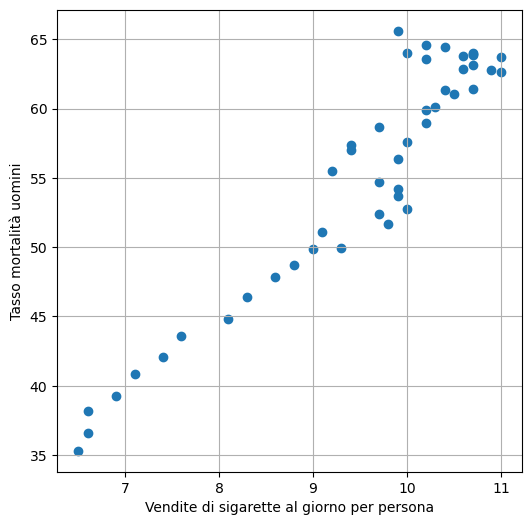

In [9]:
lag=19
rate_male_lag=np.roll(rate_male, -lag)[:-lag]
fig, ax=plt.subplots(figsize=(6,6))
ax.scatter(sales[:-lag], rate_male_lag)
ax.set_xlabel("Vendite di sigarette al giorno per persona")
ax.set_ylabel("Tasso mortalità uomini")
ax.grid()
plt.show()

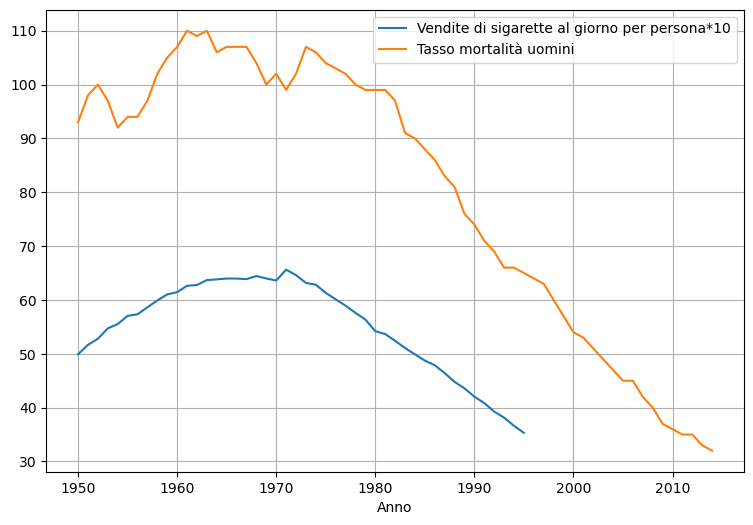

In [15]:
lag=19
rate_male_lag=np.roll(rate_male, -lag)[:-lag]

fig, ax=plt.subplots(figsize=(9,6))
ax.plot(years[:-lag], rate_male_lag,  label="Vendite di sigarette al giorno per persona*10")
ax.plot(years, sales*10, label="Tasso mortalità uomini")
ax.grid()
ax.set_xlabel("Anno")
ax.legend(loc="upper right")
plt.show()